## I. DATA PREPARATION: 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model

In [ ]:
path = '/content/gdrive/MyDrive/Data (1)/Hangtieudung.csv'

In [ ]:
df = pd.read_csv(path) 
df.head(10) 

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
0,0,TSC,2021-12-01,15:12:03,HOSE,STOCK,18.50,19.75,17.25,18.55,...,16.522,5479900.0,1.007037e+11,0.0,0.000000e+00,0.10,0.0899,0.5405,2021-12-01,Hàng tiêu dùng
1,1,VCF,2021-12-01,15:12:03,HOSE,STOCK,246.00,263.20,228.80,246.00,...,0.000,0.0,0.000000e+00,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
2,4,LAF,2021-12-01,15:12:03,HOSE,STOCK,23.00,24.60,21.40,23.30,...,23.360,3500.0,8.176000e+07,0.0,0.000000e+00,0.30,0.3000,1.3043,2021-12-01,Hàng tiêu dùng
3,20,NHT,2021-12-03,15:12:06,HOSE,STOCK,36.90,39.45,34.35,36.90,...,30.540,15400.0,5.644250e+08,0.0,0.000000e+00,-0.70,-0.5833,-1.8970,2021-12-03,Hàng tiêu dùng
4,24,BHN,2021-12-01,15:12:03,HOSE,STOCK,61.90,66.20,57.60,61.90,...,59.606,5200.0,3.222100e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
5,25,FTM,2021-12-01,15:12:03,HOSE,STOCK,5.93,6.34,5.52,5.90,...,6.070,951500.0,5.773719e+09,0.0,0.000000e+00,0.13,0.1300,2.1922,2021-12-01,Hàng tiêu dùng
6,26,HNG,2021-12-01,15:12:03,HOSE,STOCK,8.82,9.43,8.21,8.71,...,8.850,5890700.0,5.212342e+10,0.0,0.000000e+00,0.07,0.0700,0.7937,2021-12-01,Hàng tiêu dùng
7,27,SAB,2021-12-01,15:12:03,HOSE,STOCK,154.00,164.70,143.30,158.00,...,152.931,52000.0,8.127500e+09,30000.0,4.941000e+09,2.50,2.4461,1.6234,2021-12-01,Hàng tiêu dùng
8,60,VTJ,2021-12-03,15:12:08,HNX,STOCK,7.80,8.50,7.10,7.80,...,7.532,18013.0,1.356714e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-03,Hàng tiêu dùng
9,66,TFC,2021-12-03,15:12:08,HNX,STOCK,10.70,11.70,9.70,11.00,...,9.773,2000.0,2.154000e+07,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-03,Hàng tiêu dùng


In [ ]:
df.describe()

,Unnamed: 0,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,...,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
count,1.771530e+05,177153.000000,177153.000000,177153.000000,177153.000000,177153.000000,177153.000000,177153.000000,177153.000000,177153.000000,...,177153.000000,177153.000000,177153.000000,1.771530e+05,1.771530e+05,1.771530e+05,1.771530e+05,177153.000000,177153.000000,177153.000000
mean,5.908369e+05,19.137913,22.023859,16.251348,19.217858,19.391366,19.042284,19.233070,18.791403,17.058853,...,16.905814,17.072340,16.722569,1.923234e+05,2.419112e+09,2.617851e+04,5.711377e+08,0.012096,0.009930,0.185998
std,3.457216e+05,31.132097,34.763467,27.873217,31.173972,31.439182,30.890668,31.182785,30.247322,27.541559,...,27.300051,27.545296,26.898813,1.011361e+06,1.290587e+10,5.795045e+05,1.661050e+10,1.084540,0.944643,4.719183
min,0.000000e+00,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,0.100000,0.000000,0.020000,...,0.020000,0.020000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-52.300000,-50.071300,-50.000000
25%,2.916500e+05,4.600000,5.200000,3.860000,4.700000,4.720000,4.600000,4.700000,4.500000,4.300000,...,4.280000,4.320000,4.153000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,5.867680e+05,10.000000,11.850000,7.700000,10.000000,10.000000,10.000000,10.000000,10.000000,9.600000,...,9.500000,9.600000,9.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,8.904030e+05,20.300000,23.300000,16.800000,20.300000,20.450000,20.100000,20.300000,20.100000,18.207000,...,18.010000,18.300000,18.025000,1.350000e+04,1.298796e+08,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
max,1.182576e+06,339.000000,362.700000,315.300000,341.800000,347.000000,330.000000,339.000000,339.240000,311.450000,...,300.698000,308.897000,309.117000,5.168760e+07,6.520288e+11,7.891659e+07,4.897591e+12,57.500000,57.500000,1045.454500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177153 entries, 0 to 177152
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      177153 non-null  int64  
 1   code            177153 non-null  object 
 2   date            177153 non-null  object 
 3   time            177153 non-null  object 
 4   floor           177153 non-null  object 
 5   type            177153 non-null  object 
 6   basicPrice      177153 non-null  float64
 7   ceilingPrice    177153 non-null  float64
 8   floorPrice      177153 non-null  float64
 9   open            177153 non-null  float64
 10  high            177153 non-null  float64
 11  low             177153 non-null  float64
 12  close           177153 non-null  float64
 13  average         177153 non-null  float64
 14  adOpen          177153 non-null  float64
 15  adHigh          177153 non-null  float64
 16  adLow           177153 non-null  float64
 17  adClose   

In [ ]:
type(df.date[1])

str

In [ ]:
#convert data type: 
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [ ]:
df.shape

(177153, 28)

In [ ]:
df.type.value_counts(
)

STOCK    177153
Name: type, dtype: int64

In [ ]:
df_VSN = df[df['code']=='VSN']
df_BVN = df[df['code']=='BVN']
df_FBA = df[df['code']=='FBA']
df_TET = df[df['code']=='TET']
df_SGC = df[df['code']=='SGC']

In [ ]:
df_VSN

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
153,1096,VSN,2021-12-15,15:12:01,UPCOM,STOCK,39.7,45.6,33.8,38.0,...,39.803,9002.0,3.583106e+08,0.0,0.000000e+00,0.3,0.3000,0.7557,2021-12-15,Hàng tiêu dùng
232,1666,VSN,2021-12-07,15:12:01,UPCOM,STOCK,34.9,40.1,29.7,39.0,...,36.316,1900.0,6.900000e+07,20180026.0,6.477788e+11,2.1,2.1000,6.0172,2021-12-07,Hàng tiêu dùng
535,3466,VSN,2021-12-22,15:12:01,UPCOM,STOCK,36.8,42.3,31.3,39.0,...,38.274,12000.0,4.592900e+08,0.0,0.000000e+00,2.0,2.0000,5.4348,2021-12-22,Hàng tiêu dùng
544,3523,VSN,2021-12-17,15:12:02,UPCOM,STOCK,39.9,45.8,34.0,40.1,...,40.653,11800.0,4.797000e+08,0.0,0.000000e+00,0.1,0.1000,0.2506,2021-12-17,Hàng tiêu dùng
679,4422,VSN,2021-11-24,15:11:01,UPCOM,STOCK,31.1,35.7,26.5,31.9,...,31.957,5119.0,1.635690e+08,0.0,0.000000e+00,0.9,0.9000,2.8939,2021-11-24,Hàng tiêu dùng
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173825,1173828,VSN,2017-04-07,15:04:01,UPCOM,STOCK,49.7,57.1,42.3,49.7,...,47.427,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0000,0.0000,2017-04-07,Hàng tiêu dùng
173827,1173838,VSN,2017-05-30,15:05:01,UPCOM,STOCK,41.5,47.7,35.3,41.5,...,39.602,900.0,3.735000e+07,0.0,0.000000e+00,0.0,0.0000,0.0000,2017-05-30,Hàng tiêu dùng
173828,1173840,VSN,2017-06-14,15:06:01,UPCOM,STOCK,42.3,48.6,36.0,40.0,...,38.170,600.0,2.400000e+07,0.0,0.000000e+00,-2.3,-2.1948,-5.4374,2017-06-14,Hàng tiêu dùng
173829,1173842,VSN,2017-06-15,15:06:01,UPCOM,STOCK,40.0,46.0,34.0,40.1,...,38.183,1500.0,6.002000e+07,0.0,0.000000e+00,0.0,0.0000,0.0000,2017-06-15,Hàng tiêu dùng


In [ ]:
 df_VSN = df_VSN.sort_values(by='date',ascending=True) 

In [ ]:
df_VSN.head()

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
145009,976677,VSN,2017-01-03,15:01:01,UPCOM,STOCK,48.6,55.8,41.4,48.6,...,46.277,7500.0,363710000.0,0.0,0.0,1.1,1.0497,2.2634,2017-01-03,Hàng tiêu dùng
143951,969547,VSN,2017-01-04,15:01:01,UPCOM,STOCK,48.5,55.7,41.3,48.0,...,45.807,3200.0,153610000.0,0.0,0.0,-0.5,-0.4771,-1.0309,2017-01-04,Hàng tiêu dùng
147524,994711,VSN,2017-01-05,15:01:01,UPCOM,STOCK,48.0,55.2,40.8,47.0,...,44.362,16900.0,785640000.0,0.0,0.0,-3.0,-2.8628,-6.2500,2017-01-05,Hàng tiêu dùng
173818,1173821,VSN,2017-01-06,15:01:01,UPCOM,STOCK,46.5,53.4,39.6,45.0,...,42.624,11800.0,527070000.0,0.0,0.0,-1.6,-1.5268,-3.4409,2017-01-06,Hàng tiêu dùng
173819,1173822,VSN,2017-01-09,15:01:01,UPCOM,STOCK,44.7,51.4,38.0,46.0,...,43.896,100.0,4600000.0,0.0,0.0,1.3,1.2405,2.9083,2017-01-09,Hàng tiêu dùng


<ipython-input-16-262b71420296>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  map = sns.heatmap(df_VSN.corr(), annot=True)


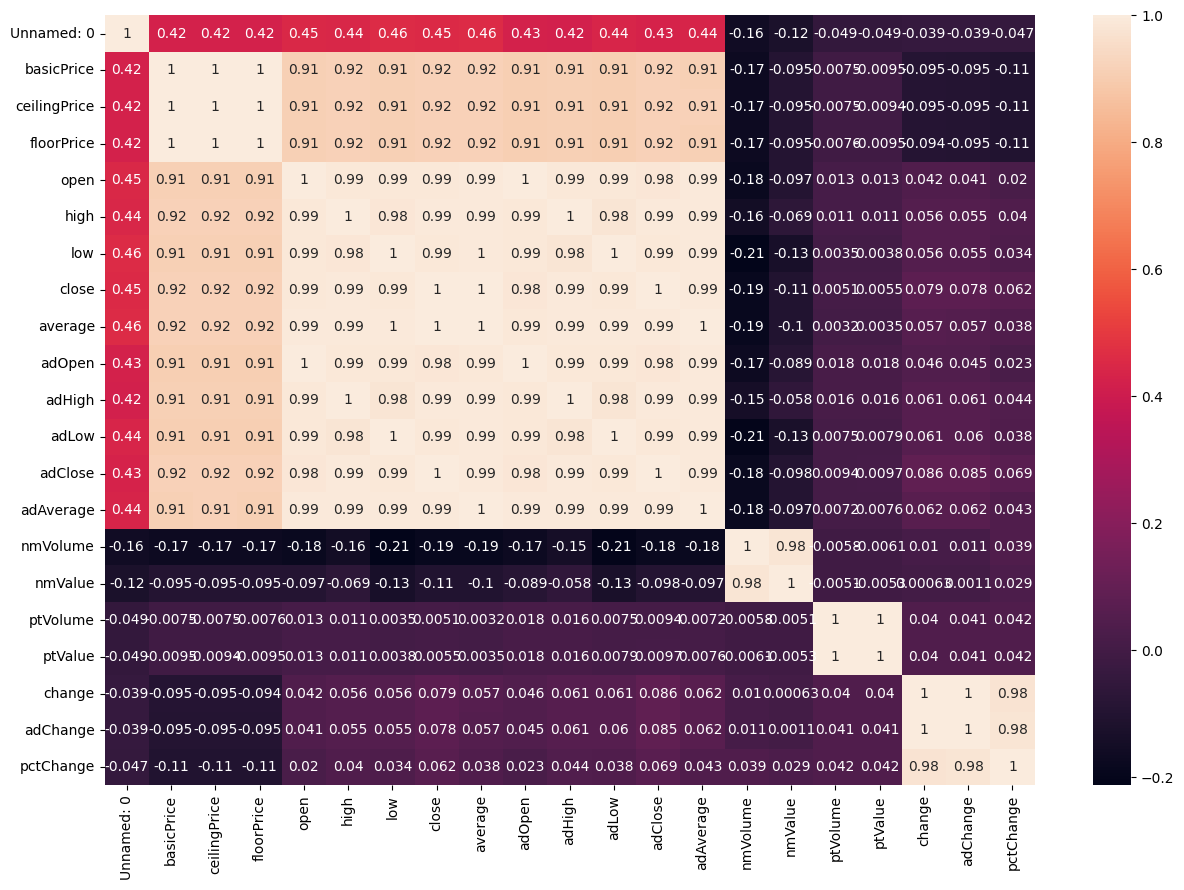

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
map = sns.heatmap(df_VSN.corr(), annot=True)

In [ ]:
# sns.boxplot(data = df_VSN['close'])

<Axes: >

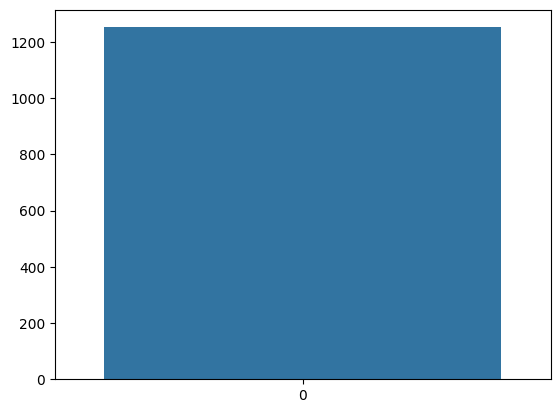

In [ ]:
sns.barplot(data = df_VSN['type'].value_counts())

<Axes: >

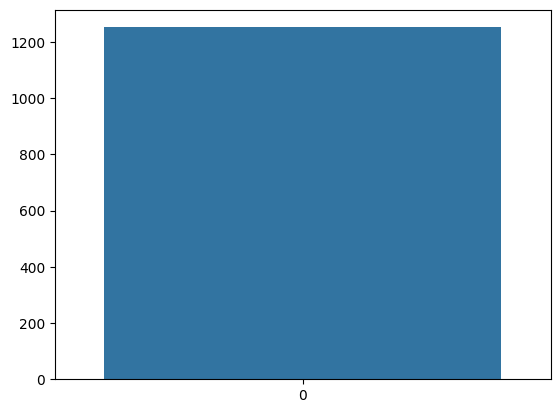

In [ ]:
sns.barplot(data = df_VSN['vietnameseName'].value_counts())


<Axes: >

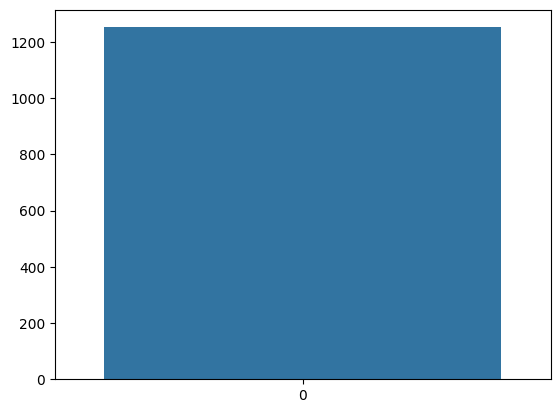

In [ ]:
sns.barplot(data = df_VSN['floor'].value_counts())

In [ ]:
df_VSN.ptVolume[df_VSN['ptVolume'] == 0].count()

1243

## II. BUILDING MODELS: 

In [ ]:
df_VSN = df_VSN[['date','open','high','low','close','nmVolume','nmValue']]

In [ ]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    
    X = df[['quarter','month','year','open','high','low','nmVolume','nmValue']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
df.head()

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
0,0,TSC,2021-12-01,15:12:03,HOSE,STOCK,18.5,19.75,17.25,18.55,...,16.522,5479900.0,1.007037e+11,0.0,0.0,0.1,0.0899,0.5405,2021-12-01,Hàng tiêu dùng
1,1,VCF,2021-12-01,15:12:03,HOSE,STOCK,246.0,263.20,228.80,246.00,...,0.000,0.0,0.000000e+00,0.0,0.0,0.0,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
2,4,LAF,2021-12-01,15:12:03,HOSE,STOCK,23.0,24.60,21.40,23.30,...,23.360,3500.0,8.176000e+07,0.0,0.0,0.3,0.3000,1.3043,2021-12-01,Hàng tiêu dùng
3,20,NHT,2021-12-03,15:12:06,HOSE,STOCK,36.9,39.45,34.35,36.90,...,30.540,15400.0,5.644250e+08,0.0,0.0,-0.7,-0.5833,-1.8970,2021-12-03,Hàng tiêu dùng
4,24,BHN,2021-12-01,15:12:03,HOSE,STOCK,61.9,66.20,57.60,61.90,...,59.606,5200.0,3.222100e+08,0.0,0.0,0.0,0.0000,0.0000,2021-12-01,Hàng tiêu dùng


In [ ]:
#Train & Test split:
train = df_VSN[:1238]
test = df_VSN[1239:]

In [ ]:
X_train, y_train = create_features(train, label='close')
X_test, y_test = create_features(test, label='close')

<ipython-input-23-b0cc44393ae0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quarter'] = df['date'].dt.quarter
<ipython-input-23-b0cc44393ae0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-23-b0cc44393ae0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

### 1. XGBoost:

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to True if you want to see it train

[0]	validation_0-rmse:25.40153	validation_1-rmse:26.40417
[1]	validation_0-rmse:17.84508	validation_1-rmse:18.54438
[2]	validation_0-rmse:12.54392	validation_1-rmse:13.00803
[3]	validation_0-rmse:8.82466	validation_1-rmse:8.89998
[4]	validation_0-rmse:6.22092	validation_1-rmse:6.28626
[5]	validation_0-rmse:4.39736	validation_1-rmse:4.37306
[6]	validation_0-rmse:3.12480	validation_1-rmse:3.30496
[7]	validation_0-rmse:2.23778	validation_1-rmse:2.42705


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.62092	validation_1-rmse:2.05985
[9]	validation_0-rmse:1.19361	validation_1-rmse:1.63945
[10]	validation_0-rmse:0.89620	validation_1-rmse:1.41118
[11]	validation_0-rmse:0.69397	validation_1-rmse:1.33182
[12]	validation_0-rmse:0.55587	validation_1-rmse:1.21407
[13]	validation_0-rmse:0.46395	validation_1-rmse:1.14964
[14]	validation_0-rmse:0.40461	validation_1-rmse:1.11460
[15]	validation_0-rmse:0.36284	validation_1-rmse:1.07063
[16]	validation_0-rmse:0.33524	validation_1-rmse:1.09247
[17]	validation_0-rmse:0.32133	validation_1-rmse:1.08015
[18]	validation_0-rmse:0.30714	validation_1-rmse:1.07550
[19]	validation_0-rmse:0.29581	validation_1-rmse:1.06997
[20]	validation_0-rmse:0.28148	validation_1-rmse:1.10595
[21]	validation_0-rmse:0.27452	validation_1-rmse:1.09752
[22]	validation_0-rmse:0.26725	validation_1-rmse:1.09111
[23]	validation_0-rmse:0.25746	validation_1-rmse:1.08901
[24]	validation_0-rmse:0.24729	validation_1-rmse:1.08323
[25]	validation_0-rmse:0.24457	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Feature Importances¶
Feature importance is a great way to get a general idea about which features the model is relying on most to make the prediction. This is a metric that simply sums up how many times each feature is split on.

We can see that the day of year was most commonly used to split trees, while hour and year came in next. Quarter has low importance due to the fact that it could be created by different dayofyear splits.

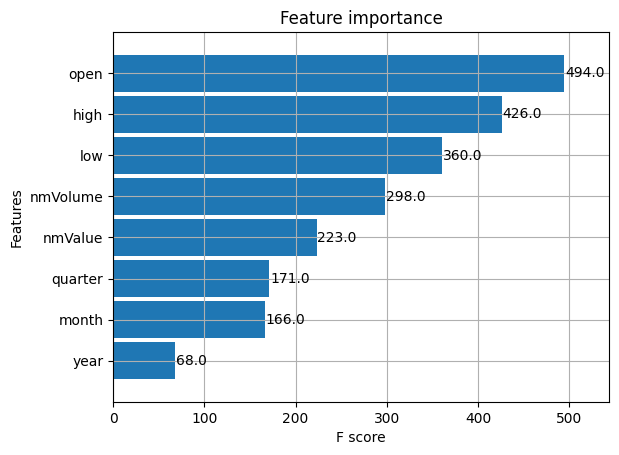

In [ ]:
_ = plot_importance(reg, height=0.9)

In [ ]:
test['Predict'] = reg.predict(X_test)

<ipython-input-29-925881924447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predict'] = reg.predict(X_test)


In [ ]:
test = test.reset_index()

In [ ]:
test.drop(columns = 'index')

,date,open,high,low,close,nmVolume,nmValue,quarter,month,year,Predict
0,2021-12-15,38.0,40.3,38.0,40.0,9002.0,3.583106e+08,4,12,2021,39.110252
1,2021-12-16,40.0,40.0,39.5,40.0,9601.0,3.828805e+08,4,12,2021,40.077103
2,2021-12-17,40.1,42.0,39.5,40.0,11800.0,4.797000e+08,4,12,2021,39.206493
3,2021-12-20,41.5,41.5,39.0,39.0,3500.0,1.379300e+08,4,12,2021,38.322941
4,2021-12-21,39.4,39.4,36.5,38.3,27050.0,9.947250e+08,4,12,2021,36.782845
5,2021-12-22,39.0,39.0,37.0,38.8,12000.0,4.592900e+08,4,12,2021,37.577324
6,2021-12-23,39.0,39.0,36.0,38.9,8000.0,3.042100e+08,4,12,2021,36.924934
7,2021-12-24,40.0,40.0,36.8,37.0,13400.0,4.964200e+08,4,12,2021,37.677559
8,2021-12-27,37.0,39.9,37.0,38.4,563.0,2.130970e+07,4,12,2021,39.497753
9,2021-12-28,39.7,39.7,36.0,36.1,29600.0,1.080400e+09,4,12,2021,37.614780


In [ ]:
train = train.reset_index()

<Axes: ylabel='close'>

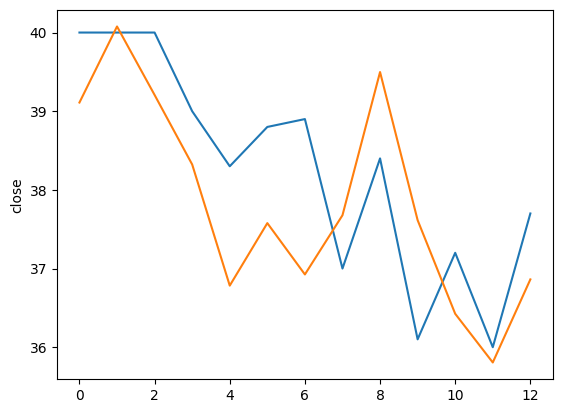

In [ ]:
sns.lineplot(data = test, y = 'close',x = test.index)
sns.lineplot(data = test, y = 'Predict', x = test.index)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print(mean_squared_error(y_true=test.close, y_pred = test.Predict))
print(mean_absolute_error(y_true=test.close, y_pred = test.Predict))
print(mean_absolute_percentage_error(y_true=test.close, y_pred = test.Predict))

1.1448455717121777
0.9422975980318509
2.4660791557567974


### 2. LGBM:

In [ ]:
lgb = LGBMRegressor()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
lgb.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=50,
          eval_metric='rmse',
          early_stopping_rounds=50)

[50]	valid_0's rmse: 1.19191	valid_0's l2: 1.42065


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's rmse: 1.13393	valid_0's l2: 1.28581


LGBMRegressor()

In [ ]:
test['lgbPredict'] = lgb.predict(X_test)

<Axes: ylabel='close'>

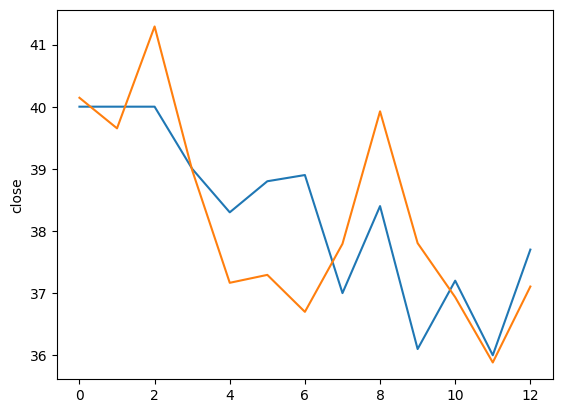

In [ ]:
sns.lineplot(data = test, y = 'close',x = test.index)
sns.lineplot(data = test, y = 'lgbPredict', x = test.index)

In [ ]:
print(mean_squared_error(y_true=test.close, y_pred = test.lgbPredict))
print(mean_absolute_error(y_true=test.close, y_pred = test.lgbPredict))
print(mean_absolute_percentage_error(y_true=test.close, y_pred = test.lgbPredict))

1.2698952801846206
0.8959013869012907
2.343779470512161


### LSTM: 

In [ ]:
df_VSN

,date,open,high,low,close,nmVolume,nmValue
145009,2017-01-03,48.6,49.8,48.0,49.7,7500.0,3.637100e+08
143951,2017-01-04,48.0,48.1,48.0,48.0,3200.0,1.536100e+08
147524,2017-01-05,47.0,48.0,45.0,45.0,16900.0,7.856400e+08
173818,2017-01-06,45.0,46.4,44.0,44.9,11800.0,5.270700e+08
173819,2017-01-09,46.0,46.0,46.0,46.0,100.0,4.600000e+06
...,...,...,...,...,...,...,...
10106,2021-12-27,37.0,39.9,37.0,38.4,563.0,2.130970e+07
9276,2021-12-28,39.7,39.7,36.0,36.1,29600.0,1.080400e+09
17688,2021-12-29,37.7,37.7,36.0,37.2,900.0,3.328000e+07
17686,2021-12-30,35.2,36.1,35.2,36.0,4200.0,1.502900e+08


In [ ]:
validate = df_VSN[['date','open','high','low','close','nmVolume','nmValue']].tail(14)
df_VSN.drop(df_VSN.tail(10).index,inplace=True)

In [ ]:
#fit_transform: 
X_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df_VSN[['open','high','low','nmVolume','nmValue']])
Y_scaler = MinMaxScaler()
Y_data = Y_scaler.fit_transform(df_VSN[['close']])

In [ ]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
     X = []
     y = []
     start = start + window
     if end is None:
         end = len(dataset) - horizon
     for i in range(start, end):
         indices = range(i-window, i)
         X.append(dataset[indices])
         indicey = range(i+1, i+1+horizon)
         y.append(target[indicey])
     return np.array(X), np.array(y) 

In [ ]:
hist_window = 60 #Hist là số ngày đem đi train
horizon = 14 #là số ngày muốn forecast dựa trên hist_window

In [ ]:
 TRAIN_SPLIT = 1000
 x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
 x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [ ]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [ ]:
lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.25),
     tf.keras.layers.Dense(units=horizon),
 ])

In [ ]:
 lstm_model.compile(optimizer='adam', loss='mse')

In [ ]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 400)          329600    
 l)                                                              
                                                                 
 dense (Dense)               (None, 60, 20)            8020      
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              205200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0

In [ ]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [ ]:
history = lstm_model.fit(train_data,epochs=10,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)  

Epoch 1/10
100/100 [==============================] - 193s 2s/step - loss: 0.0658 - val_loss: 0.0051
Epoch 2/10
100/100 [==============================] - 173s 2s/step - loss: 0.0248 - val_loss: 0.0048
Epoch 3/10
100/100 [==============================] - 177s 2s/step - loss: 0.0175 - val_loss: 0.0036
Epoch 4/10
100/100 [==============================] - 175s 2s/step - loss: 0.0145 - val_loss: 0.0035
Epoch 5/10
100/100 [==============================] - 174s 2s/step - loss: 0.0121 - val_loss: 0.0044
Epoch 6/10
100/100 [==============================] - 172s 2s/step - loss: 0.0112 - val_loss: 0.0036
Epoch 7/10
100/100 [==============================] - 174s 2s/step - loss: 0.0099 - val_loss: 0.0042
Epoch 8/10
100/100 [==============================] - 174s 2s/step - loss: 0.0095 - val_loss: 0.0033
Epoch 9/10
100/100 [==============================] - 173s 2s/step - loss: 0.0087 - val_loss: 0.0042
Epoch 10/10
100/100 [==============================] - 174s 2s/step - loss: 0.0081 - val_lo

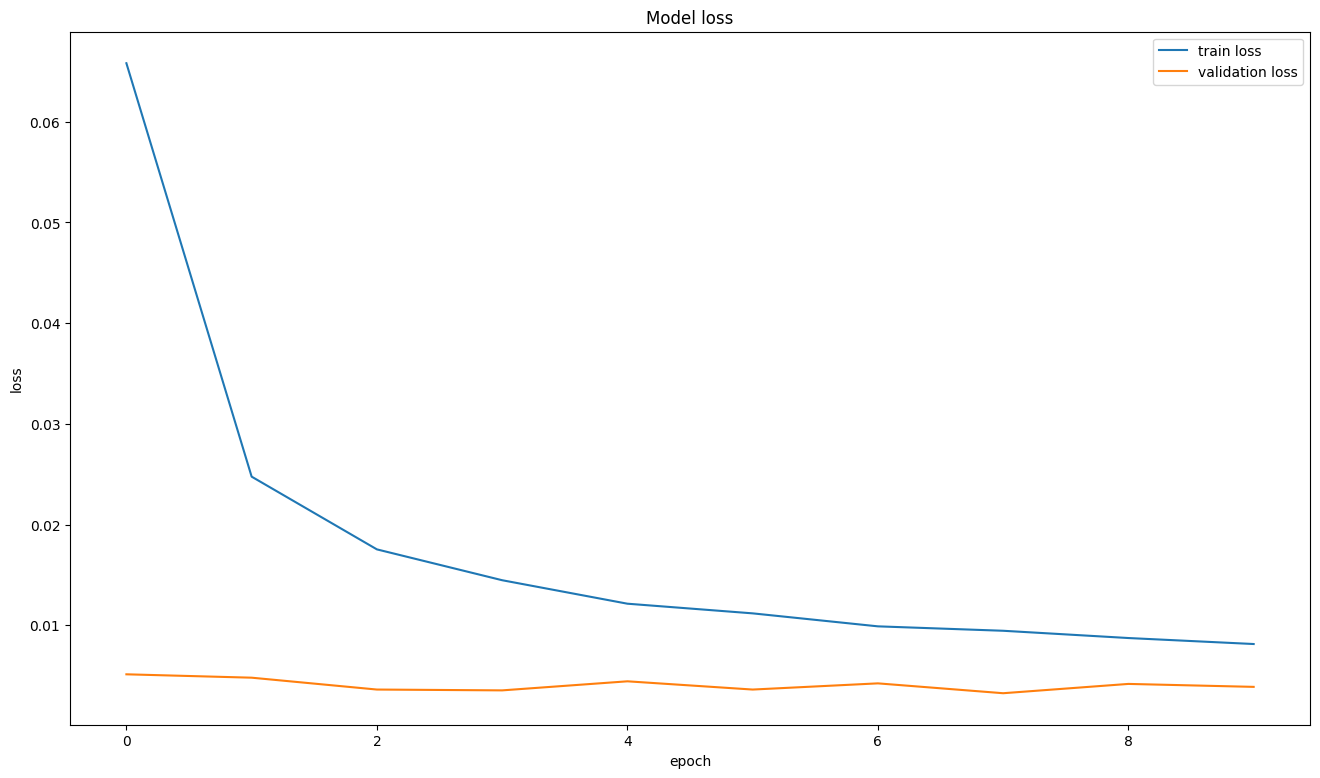

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [ ]:
data_val = X_scaler.fit_transform(df_VSN[['open','high','low','nmVolume','nmValue']].tail(60))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [ ]:
lstm_pred = lstm_model.predict(val_rescaled)
lstm_pred

1/1 [==============================] - 3s 3s/step


array([[0.7195555 , 0.7166996 , 0.71079564, 0.7138248 , 0.7098319 ,
        0.70038533, 0.69329906, 0.67342985, 0.6909575 , 0.70076156,
        0.7056039 , 0.69069755, 0.6954528 , 0.6981064 ]], dtype=float32)

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
pred_Inverse = Y_scaler.inverse_transform(lstm_pred)

In [ ]:
pred_Inverse = pd.DataFrame(pred_Inverse)
pred_Inverse = pred_Inverse.T
pred_Inverse

,0
0,45.941643
1,45.849396
2,45.658699
3,45.756542
4,45.627571
5,45.322445
6,45.093559
7,44.451782
8,45.017925
9,45.334595


<Axes: ylabel='close'>

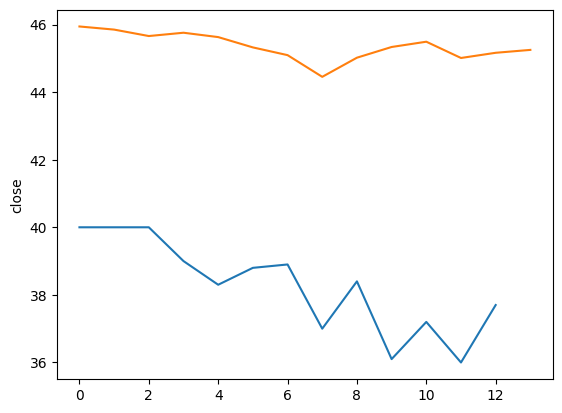

In [ ]:
sns.lineplot(data = test, y = 'close',x = test.index)
sns.lineplot(data = pred_Inverse, y = pred_Inverse[0], x = pred_Inverse.index)

In [ ]:
# pred_Inverse = pred_Inverse.rename(columns={0: "x"})
# pred_Inverse = pred_Inverse.drop(13)
pred_Inverse

,x
0,45.941643
1,45.849396
2,45.658699
3,45.756542
4,45.627571
5,45.322445
6,45.093559
7,44.451782
8,45.017925
9,45.334595


In [ ]:
print(mean_squared_error(y_true=test.close, y_pred = pred_Inverse['x']))
print(mean_absolute_error(y_true=test.close, y_pred = pred_Inverse['x']))
print(mean_absolute_percentage_error(y_true=test.close, y_pred = pred_Inverse['x']))

51.69233699301576
7.101370415320763
18.682919341528915
